In [24]:
from rpy2 import robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()
import pandas as pd
import warnings, random
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)
import rpy2.robjects as ro
from rpy2.robjects.conversion import localconverter
r_source = robjects.r['source']
r_assign = robjects.r['assign']
r_options = robjects.r['options']
r_options(warn=-1)
from rpy2.rinterface_lib.callbacks import logger as rpy2_logger
import itertools
import time
import uuid
import matplotlib.pyplot as plt
from numba import jit
import numpy as np
import pandas as pd
import scipy
from COVIDScenarioPipeline.SEIR import seir, setup
from COVIDScenarioPipeline.SEIR.utils import config
from COVIDScenarioPipeline.SEIR.profile import profile_options
import multiprocessing
import pathlib
import time

config_file='config.yml'
scenario = 'Current'
nsim = 10
jobs = 2
config.set_file(config_file)

spatial_config = config["spatial_setup"]
spatial_base_path = pathlib.Path(spatial_config["base_path"].get())


s = setup.Setup(setup_name=config["name"].get() + "_" + str(scenario),
                        spatial_setup=setup.SpatialSetup(
                            setup_name=spatial_config["setup_name"].get(),
                            geodata_file=spatial_base_path / spatial_config["geodata"].get(),
                            mobility_file=spatial_base_path / spatial_config["mobility"].get(),
                            popnodes_key=spatial_config["popnodes"].get(),
                            nodenames_key=spatial_config["nodenames"].get()
                        ),
                        nsim=nsim,
                        npi_scenario=scenario,
                        npi_config=config["interventions"]["settings"][scenario],
                        seeding_config=config["seeding"],
                        ti=config["start_date"].as_date(),
                        tf=config["end_date"].as_date(),
                        interactive=False,
                        write_csv=False,
                        dt=config["dt"].as_number())

[1] "/Users/chadi/Documents/phd/COVID-19_CH_dataseed/scenario-pipeline"


R[write to console]: Parsed with column specification:
cols(
  ShortName = col_character(),
  var = col_character(),
  ll_comp = col_character(),
  mean = col_double(),
  median = col_double(),
  q025 = col_double(),
  q975 = col_double(),
  q25 = col_double(),
  q75 = col_double()
)

R[write to console]: Parsed with column specification:
cols(
  Name = col_character(),
  ShortName = col_character(),
  CantonNumber = col_double(),
  FIPS = col_character(),
  NUTS = col_character(),
  pop2018 = col_double(),
  geoid = col_character()
)



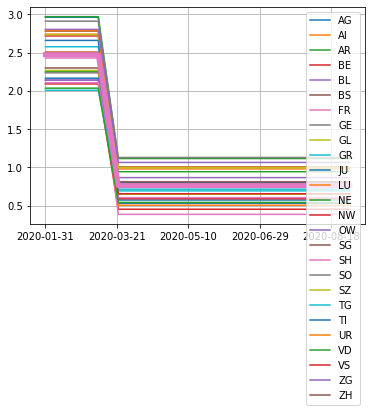

In [74]:
r_assign('ti_str', str(s.ti))
r_assign('tf_str', str(s.tf))
r_assign('foldername', '../data/ch/')
r_assign('setupname', 'Current')#s.setup_name)
r_source('NPI/NPI_for_baseline_deltas.R')
R0 = robjects.r['NPI'].T
R0.plot()
ax = R0.mean(axis=1).plot(lw=5)
ax.grid()

[1] "/Users/chadi/Documents/phd/COVID-19_CH_dataseed/scenario-pipeline"


R[write to console]: Parsed with column specification:
cols(
  ShortName = col_character(),
  var = col_character(),
  ll_comp = col_character(),
  mean = col_double(),
  median = col_double(),
  q025 = col_double(),
  q975 = col_double(),
  q25 = col_double(),
  q75 = col_double()
)

R[write to console]: Parsed with column specification:
cols(
  Name = col_character(),
  ShortName = col_character(),
  CantonNumber = col_double(),
  FIPS = col_character(),
  NUTS = col_character(),
  pop2018 = col_double(),
  geoid = col_character()
)



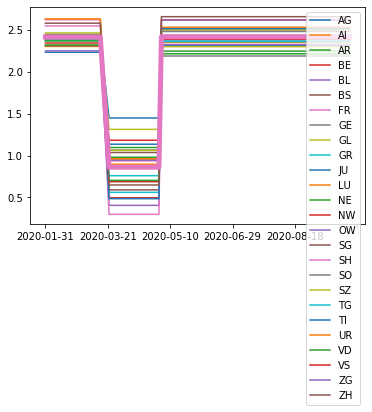

In [79]:
r_assign('ti_str', str(s.ti))
r_assign('tf_str', str(s.tf))
r_assign('foldername', '../data/ch/')
r_assign('setupname', 'Stopped')#s.setup_name)
r_source('NPI/NPI_for_baseline.R')
R0 = robjects.r['NPI'].T
R0.plot()
R0.mean(axis=1).plot(lw=5)

[1] "/Users/chadi/Documents/phd/COVID-19_CH_dataseed/scenario-pipeline"


R[write to console]: Parsed with column specification:
cols(
  ShortName = col_character(),
  var = col_character(),
  ll_comp = col_character(),
  mean = col_double(),
  median = col_double(),
  q025 = col_double(),
  q975 = col_double(),
  q25 = col_double(),
  q75 = col_double()
)

R[write to console]: Parsed with column specification:
cols(
  Name = col_character(),
  ShortName = col_character(),
  CantonNumber = col_double(),
  FIPS = col_character(),
  NUTS = col_character(),
  pop2018 = col_double(),
  geoid = col_character()
)



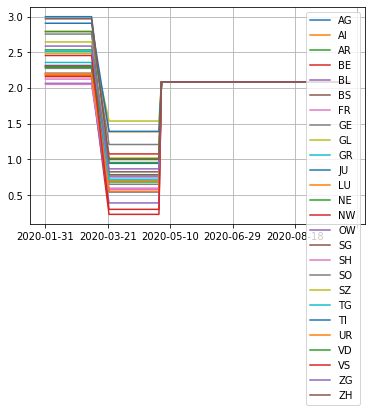

In [93]:
r_assign('ti_str', str(s.ti))
r_assign('tf_str', str(s.tf))
r_assign('foldername', '../data/ch/')
r_assign('setupname', 'TestAndIsolate')#s.setup_name)
r_source('NPI/NPI_for_baseline_deltas.R')
R0 = robjects.r['NPI'].T
ax =R0.plot()
#ax = R0.mean(axis=1).plot(lw=5)
ax.grid()

In [94]:
pd.read_csv('../data/ch/mobility_matrix_adj.csv')

,ori,dest,amount
0,AG,AG,756121.071
1,AG,BE,14301.461
2,AG,BL,22311.430
3,AG,BS,7563.693
4,AG,FR,325.829
...,...,...,...
262,ZH,SZ,24061.012
263,ZH,TG,34710.740
264,ZH,UR,255.374
265,ZH,ZG,21528.831
